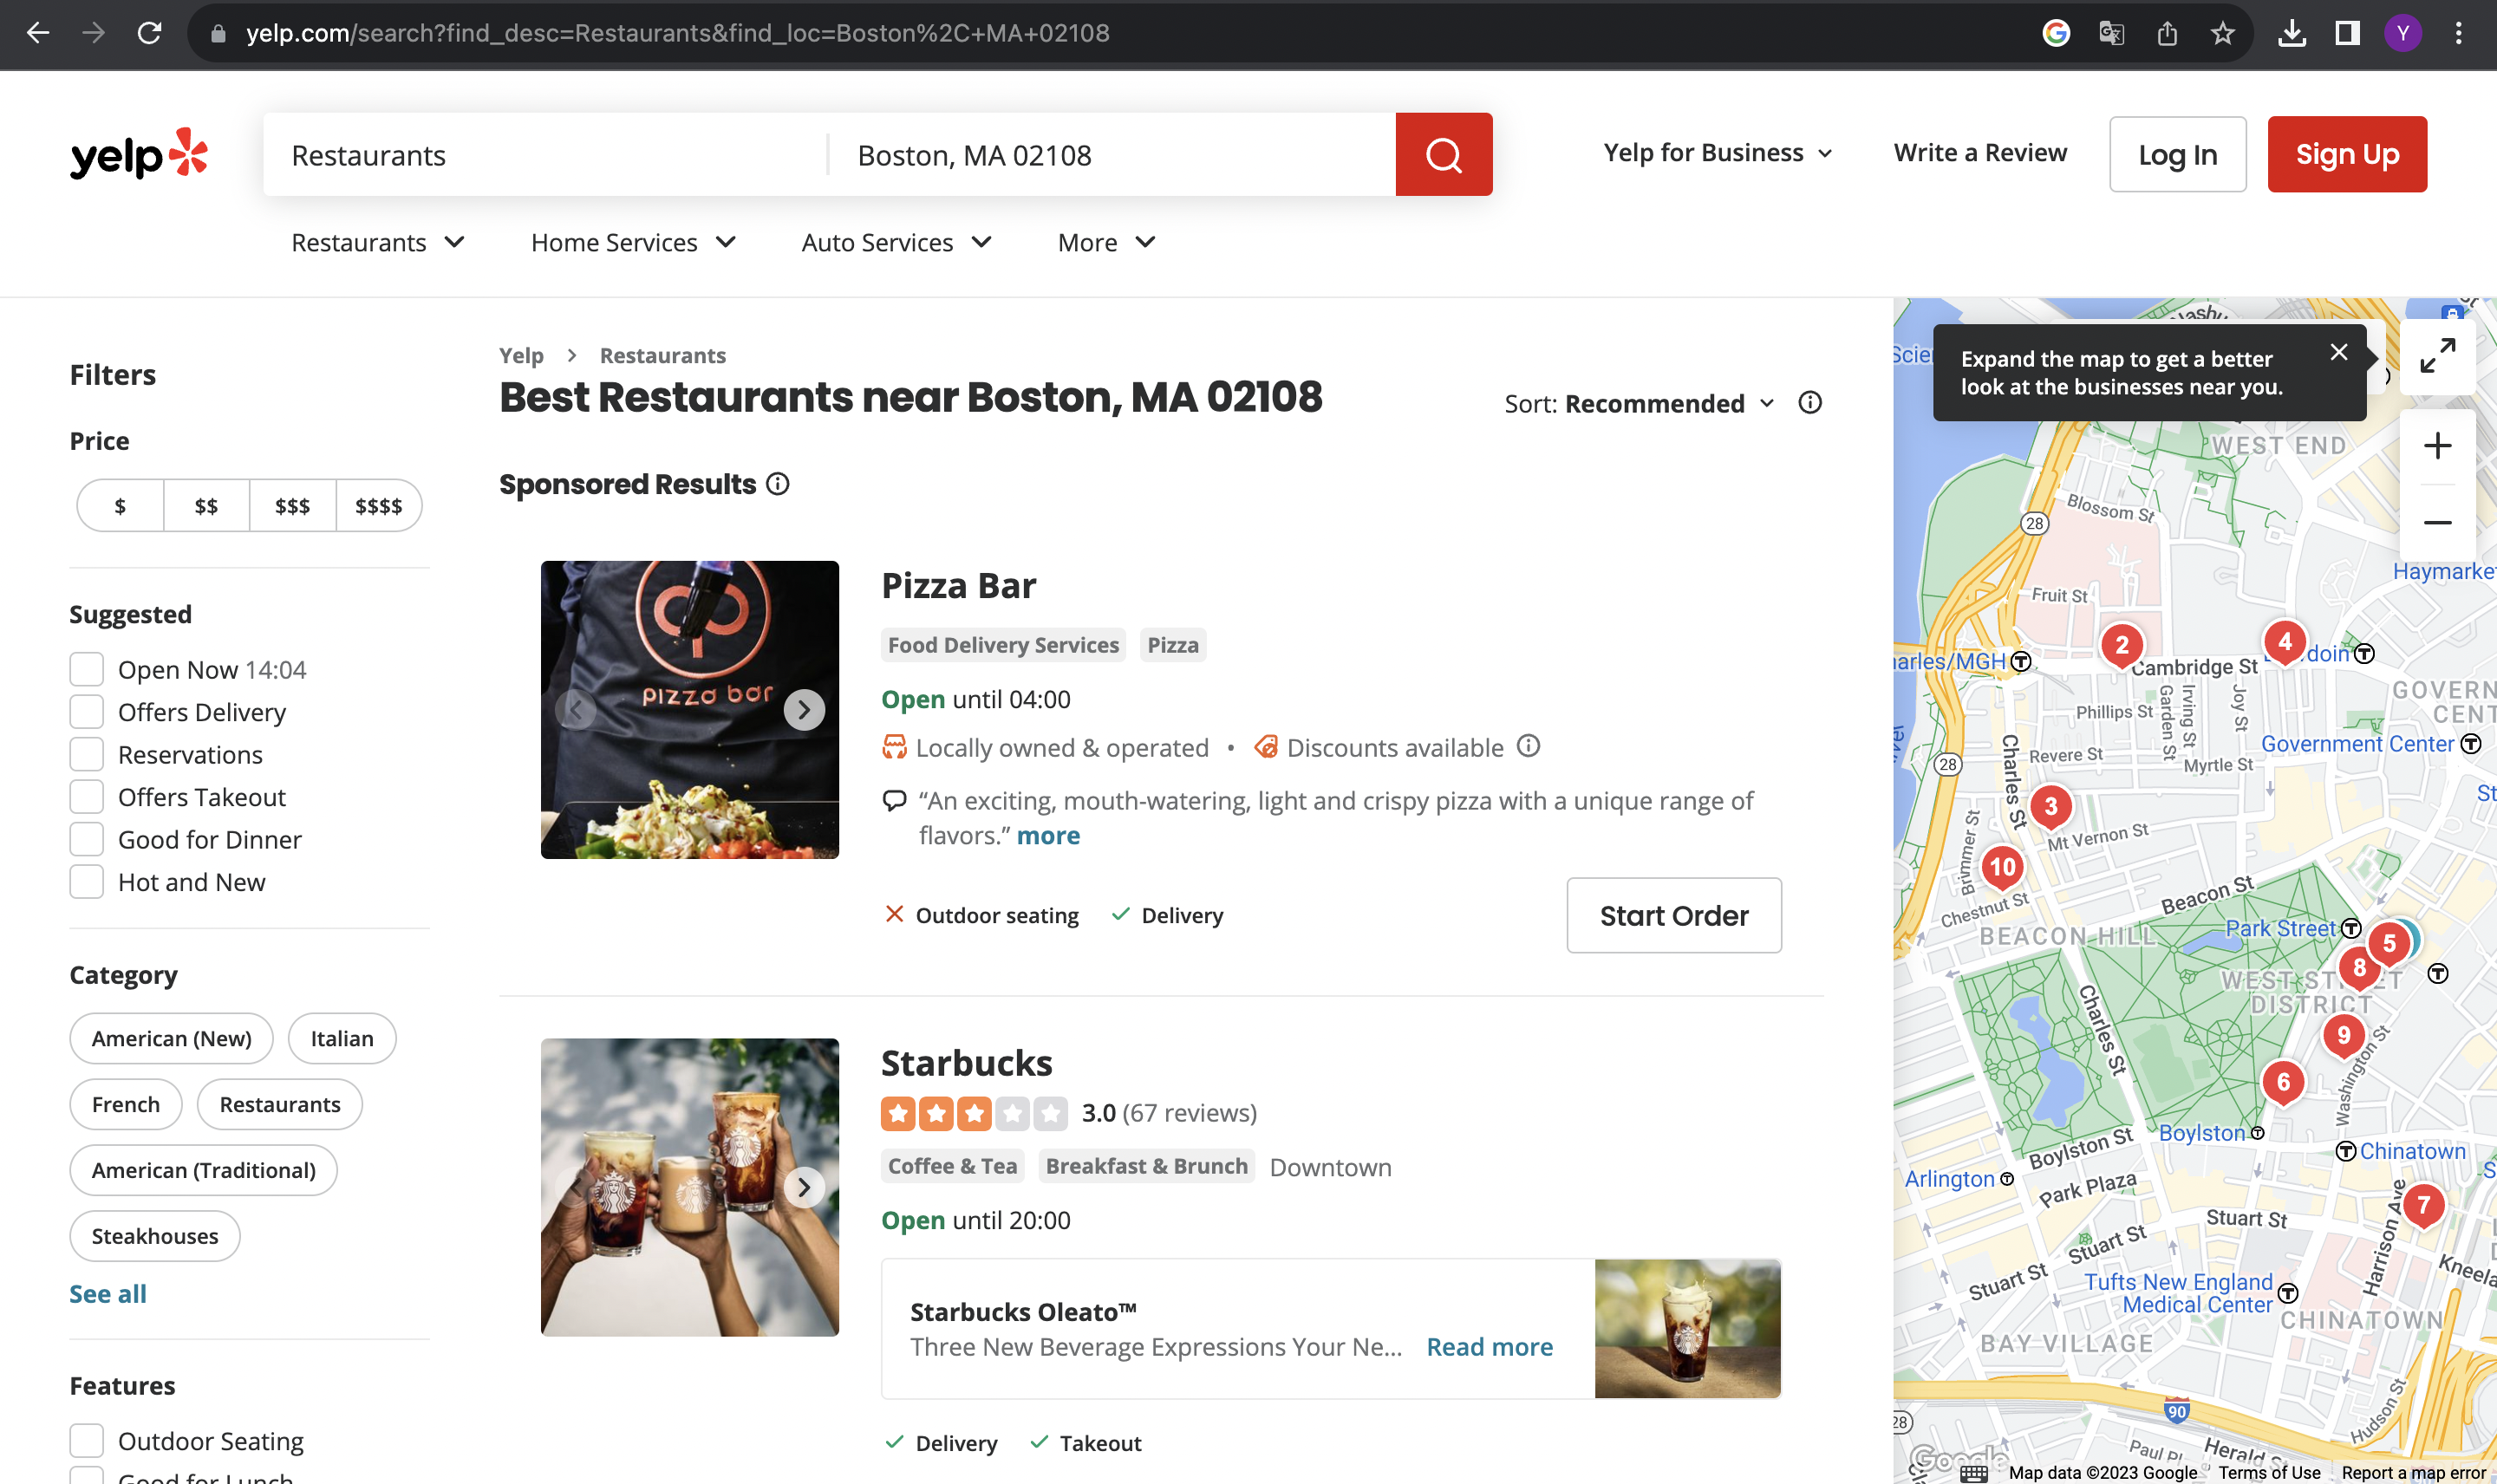

In [1]:
#CS 688 Assignment3 Yiwei Zhao

#1. On Yelp search for Restaurants in "Boston, MA 02108"
from IPython.display import Image
Image(filename = 'yelp.png', width=1200, height=900)

In [2]:
#2. Get the URL for the first three pages of results 

import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

search_url = "https://www.yelp.com/search?find_desc=Restaurants&find_loc=Boston%2C+MA+02108"

reviews = [] 

for page_number in range(3):
    # Construct the URL for the current page
    current_page_url = f"{search_url}&start={(page_number) * 10}"  #Since Yelp gives back 10 results in a page
    
    # Send an HTTP request to the current page
    response = requests.get(current_page_url)
    soup = bs(response.content, 'html.parser')
    
    R = soup.find_all('p', class_='css-16lklrv')
    
    print(current_page_url)
    
    for r in R:
        reviews.append(r)

https://www.yelp.com/search?find_desc=Restaurants&find_loc=Boston%2C+MA+02108&start=0
https://www.yelp.com/search?find_desc=Restaurants&find_loc=Boston%2C+MA+02108&start=10
https://www.yelp.com/search?find_desc=Restaurants&find_loc=Boston%2C+MA+02108&start=20


In [3]:
# Get all of reviews from 3 pages

review_results = [] 

for item in reviews:
    review = item.get_text().rstrip(" more")
    
    review_results.append(review)

for result in review_results:
    print(result)

“The hostess was very accommodating, service was outstanding, food and beverages amazing. Easily the best veal chop I've ever had and my wife rated her lobster…” 
“Excellent pastas ....meatballs were above most restaurants.  Pcs of grilled bread were excellent.  Service fast.  Unfortunately they have a time limit of 1 and…” 
“Probably my favorite restaurant in the Beacon Hill area so far!

I think Ma Maison is quickly becoming my go-to spot. Living in Beacon Hill has a lot of…” 
“I would recommend Peking duck, soup dumplings,it's actually good here ! Service is also efficient!” 
“Super friendly staff!  Emerson students on break?  At any rate, first class folks, sweet and engaging.

Enjoyed the Vieux Carre (or, perhaps, two...), expertly…” 
“One of the best breakfasts we had in Boston was at Cafe Bonjour as they delivered quick service with great food.
We had the bonjour classic crepe with Nutella,…” 
“Hey, man! So, like, check it out. We heard about this joint from this awesome bartend

In [4]:
#3. Use afinn method for sentiment analysis
from afinn import Afinn

# Get scores and labels
afinn = Afinn()
scores = [afinn.score(result) for result in review_results]

sentiment = [
    'postive' if score > 0 
    else 'negative' if score < 0
    else 'neutral'
    for score in scores
]


df = pd.DataFrame({
    'reviews': review_results,
    'scores': scores,
    'sentiments': sentiment
})

print(df)

                                              reviews  scores sentiments
0   “The hostess was very accommodating, service w...    12.0    postive
1   “Excellent pastas ....meatballs were above mos...     6.0    postive
2   “Probably my favorite restaurant in the Beacon...     2.0    postive
3   “I would recommend Peking duck, soup dumplings...     5.0    postive
4   “Super friendly staff!  Emerson students on br...    11.0    postive
5   “One of the best breakfasts we had in Boston w...     6.0    postive
6   “Hey, man! So, like, check it out. We heard ab...     8.0    postive
7   “Food: \n\nCrab Cakes ($24) - solid quality, n...     7.0    postive
8   “Last night, we celebrated our family reunion ...     7.0    postive
9   “A hidden gem in Chinatown for good quality sa...     8.0    postive
10  “Absolutely fabulous, fresh, and beautifully p...    15.0    postive
11  “Panagia mou! This food is outstanding! The ch...     9.0    postive
12  “Okay, I gotta start with the fact that this i.

In [5]:
#4. Use NRCLex method for sentiment analysis
from nrclex import NRCLex

emotions = []

with open('top_emotion.txt', 'w') as f:
    for i in range(len(review_results)):
        emotion = NRCLex(review_results[i])
        print ('\n\n',review_results[i],': ',emotion.top_emotions, file = f)

In [6]:
with open('top_emotion.txt', 'r') as f:
    content = f.read()
    
print(content)



 “The hostess was very accommodating, service was outstanding, food and beverages amazing. Easily the best veal chop I've ever had and my wife rated her lobster…”  :  [('trust', 0.2222222222222222), ('positive', 0.2222222222222222), ('negative', 0.2222222222222222), ('joy', 0.2222222222222222)]


 “Excellent pastas ....meatballs were above most restaurants.  Pcs of grilled bread were excellent.  Service fast.  Unfortunately they have a time limit of 1 and…”  :  [('trust', 0.25), ('positive', 0.25), ('joy', 0.25), ('anticipation', 0.25)]


 “Probably my favorite restaurant in the Beacon Hill area so far!

I think Ma Maison is quickly becoming my go-to spot. Living in Beacon Hill has a lot of…”  :  [('trust', 0.3333333333333333), ('positive', 0.3333333333333333), ('joy', 0.3333333333333333)]


 “I would recommend Peking duck, soup dumplings,it's actually good here ! Service is also efficient!”  :  [('positive', 0.36363636363636365)]


 “Super friendly staff!  Emerson students on break?

In [7]:
#5. Add the name of the restaurant to the data frame
name = [review.find_previous('img', class_='css-xlzvdl')['alt'] for review in reviews]

print(name)

['1928 Beacon Hill', 'Carmelina’s', 'Ma Maison', 'JiangNan Boston', 'French Quarter', 'Cafe Bonjour', 'The Tip Tap Room', '75 Chestnut', 'Yvonne’s', 'Tora Japanese Restaurant', 'Neptune Oyster', 'Krasi', 'Beacon Hill Books & Cafe', 'Democracy Brewing', 'Dynasty', '4th Wall Restaurant & Bar', 'Hobgoblin Bar', 'RUKA Restobar', 'The Salty Pig', 'The Paramount', 'Figs by Todd English', 'The Dubliner', 'Boston Sail Loft', 'Lotus Test Kitchen', 'Toscano Restaurant', 'Amar', 'Saltie Girl', 'Silvertone Bar & Grill', 'Citrus & Salt', 'Somenya - Soba restaurant']


In [8]:
df.insert(loc=0, column='restaurants', value=name)
print(df)

                  restaurants  \
0            1928 Beacon Hill   
1                 Carmelina’s   
2                   Ma Maison   
3             JiangNan Boston   
4              French Quarter   
5                Cafe Bonjour   
6            The Tip Tap Room   
7                 75 Chestnut   
8                    Yvonne’s   
9    Tora Japanese Restaurant   
10             Neptune Oyster   
11                      Krasi   
12   Beacon Hill Books & Cafe   
13          Democracy Brewing   
14                    Dynasty   
15  4th Wall Restaurant & Bar   
16              Hobgoblin Bar   
17              RUKA Restobar   
18              The Salty Pig   
19              The Paramount   
20       Figs by Todd English   
21               The Dubliner   
22           Boston Sail Loft   
23         Lotus Test Kitchen   
24         Toscano Restaurant   
25                       Amar   
26                Saltie Girl   
27     Silvertone Bar & Grill   
28              Citrus & Salt   
29  Someny